<a href="https://colab.research.google.com/github/mgultekin/Building-Generative-AI-Applications-with-Gradio/blob/main/ImageCaptioningApp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Object Detection App


https://huggingface.co/docs/transformers.js/en/pipelines#pipeline-options

In [1]:
# Install necessary packages

!pip install gradio

  Using cached gradio-5.8.0-py3-none-any.whl.metadata (16 kB)
  Using cached aiofiles-23.2.1-py3-none-any.whl.metadata (9.7 kB)
  Using cached anyio-4.7.0-py3-none-any.whl.metadata (4.7 kB)
  Using cached fastapi-0.115.6-py3-none-any.whl.metadata (27 kB)
  Using cached ffmpy-0.4.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached gradio_client-1.5.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached huggingface_hub-0.26.5-py3-none-any.whl.metadata (13 kB)
  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached pydantic-2.10.3-py3-none-any.whl.metadata (172 kB)
  Using cached pydub-0.25.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached python_multipart-0.0.19-py3-none-any.whl.metadata (1.8 kB)
  Using cached ruff-0.8.2-py3-none-macosx_11_0_arm64.whl.metadata (25 kB)
  Using cached safehttpx-0.1.6-py3-none-any.whl.metadata (4.2 kB)
  Using cached semantic_version-2.10.0-py2.py3-none-any.whl.metadata

In [2]:
!pip install timm

  Using cached timm-1.0.12-py3-none-any.whl.metadata (51 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached sympy-1.13.1-py3-none-any.whl.metadata (12 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
Using cached timm-1.0.12-py3-none-any.whl (2.4 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 MB 3.2 MB/s eta 0:00:0000:0100:01
Using cached sympy-1.13.1-py3-none-any.whl (6.2 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 3.0 MB/s eta 0:00:00a 0:00:01
Using cached networkx-3.4.2-py3-none-any.whl (1.7 MB)
Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)


In [3]:
import base64
import io
import os

import IPython
from IPython.display import HTML, Image, display
from PIL import Image



In [4]:
!pip install transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 1.9 MB/s eta 0:00:00a 0:00:01


In [5]:
# Example to use the 'transformers' library for text classification from transformers import pipeline
from transformers import pipeline

pipe = pipeline('object-detection')

ImportError: cannot import name 'pipeline' from 'transformers' (/opt/miniconda3/envs/computer_vision/lib/python3.11/site-packages/transformers/__init__.py)

In [ ]:
# Sample image URL for demonstration
image_url = "https://free-images.com/lg/0b0f/tennis_player_caroline_wozniacki.jpg"
display(IPython.display.Image(url=image_url))

In [ ]:

from io import BytesIO

import requests
from PIL import Image, ImageDraw

# Load an image from a URL
#image_url = "https://example.com/path/to/your/image.jpg"
image_url = "https://free-images.com/or/52d9/hmr2_07_38.jpg"
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

# Perform object detection
results = pipe(image)

In [8]:
results

[{'score': 0.7479414939880371,
  'label': 'backpack',
  'box': {'xmin': 22, 'ymin': 30, 'xmax': 212, 'ymax': 125}},
 {'score': 0.9989632368087769,
  'label': 'tennis racket',
  'box': {'xmin': 160, 'ymin': 455, 'xmax': 195, 'ymax': 677}},
 {'score': 0.9997134804725647,
  'label': 'person',
  'box': {'xmin': 163, 'ymin': 124, 'xmax': 505, 'ymax': 762}},
 {'score': 0.9807536005973816,
  'label': 'sports ball',
  'box': {'xmin': 473, 'ymin': 297, 'xmax': 503, 'ymax': 325}}]

In [9]:
# Draw bounding box definition
def draw_bounding_box(im, score, label, xmin, ymin, xmax, ymax, index, num_boxes):
	""" Draw a bounding box. """

	print(f"Drawing bounding box {index} of {num_boxes}...")

	# Draw the actual bounding box
	im_with_rectangle = ImageDraw.Draw(im)
	im_with_rectangle.rounded_rectangle((xmin, ymin, xmax, ymax), outline = "red", width = 5, radius = 10)

	# Draw the label
	im_with_rectangle.text((xmin+35, ymin-25), label, fill="white", stroke_fill = "red")

	# Return the intermediate result
	return im

In [10]:
def draw_boxes(image, results):
    num_boxes = len(results)
    index = 0

    # Draw bounding box for each result
    for bounding_box in results:

      # Get actual box
      box = bounding_box["box"]

      # Draw the bounding box
      im = draw_bounding_box(image, bounding_box["score"], bounding_box["label"],\
        box["xmin"], box["ymin"], box["xmax"], box["ymax"], index, num_boxes)

      # Increase index by one
      index += 1

In [11]:
draw_boxes(image, results)

Drawing bounding box 0 of 4...
Drawing bounding box 1 of 4...
Drawing bounding box 2 of 4...
Drawing bounding box 3 of 4...


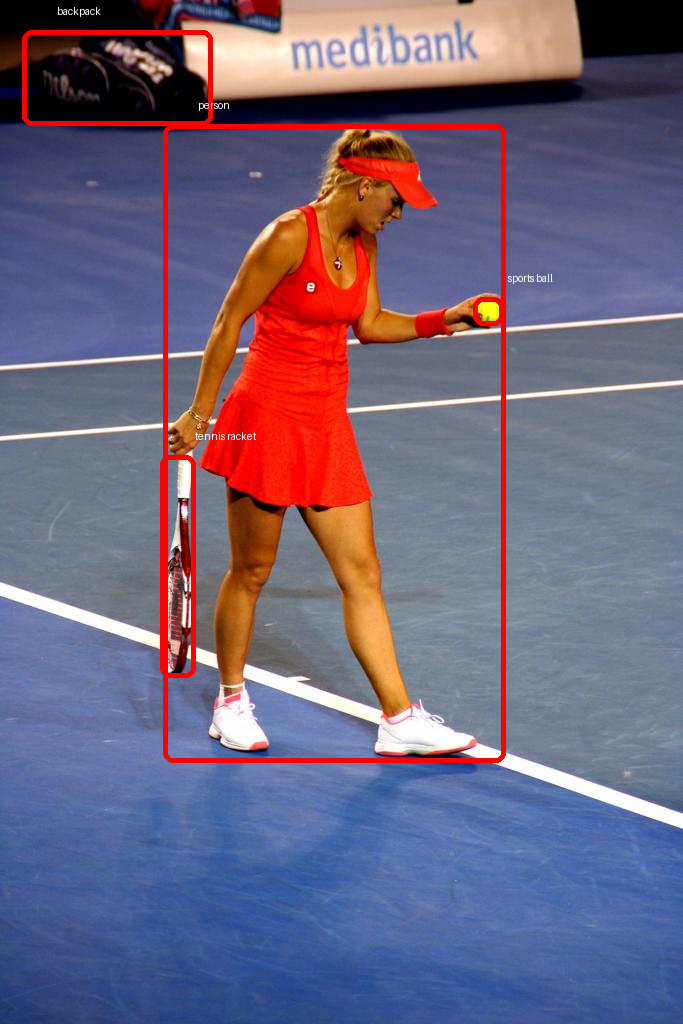

In [12]:
image

#Gradio Interface

In [13]:

# Function to convert PIL image to base64 string
#def image_to_base64_str(pil_image):
#    byte_arr = io.BytesIO()
#    pil_image.save(byte_arr, format='PNG')
#    byte_arr = byte_arr.getvalue()
#    return str(base64.b64encode(byte_arr).decode('utf-8'))

def detect(image):
    #base64_image = image_to_base64_str(image)
    results = pipe(image)
    draw_boxes(image, results)
    return image

In [16]:
# Create a Gradio interface to interactively demonstrate the image captioning functionality
import gradio as gr

gr.close_all()
demo = gr.Interface(fn=detect,
                    inputs=[gr.Image(label="Upload image", type="pil")],
                    outputs=[gr.Image(label="Detected image", type="pil")],
                    title="Object detection",
                    description="Object detection model demo",
                    allow_flagging="never")

demo.launch(share=True)

/opt/miniconda3/lib/python3.12/site-packages/gradio/interface.py:399: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated.Use `flagging_mode` instead.
  warnings.warn(


* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://e49f8ed20bd3d99138.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Drawing bounding box 0 of 3...
Drawing bounding box 1 of 3...
Drawing bounding box 2 of 3...
Drawing bounding box 0 of 3...
Drawing bounding box 1 of 3...
Drawing bounding box 2 of 3...
Drawing bounding box 0 of 27...
Drawing bounding box 1 of 27...
Drawing bounding box 2 of 27...
Drawing bounding box 3 of 27...
Drawing bounding box 4 of 27...
Drawing bounding box 5 of 27...
Drawing bounding box 6 of 27...
Drawing bounding box 7 of 27...
Drawing bounding box 8 of 27...
Drawing bounding box 9 of 27...
Drawing bounding box 10 of 27...
Drawing bounding box 11 of 27...
Drawing bounding box 12 of 27...
Drawing bounding box 13 of 27...
Drawing bounding box 14 of 27...
Drawing bounding box 15 of 27...
Drawing bounding box 16 of 27...
Drawing bounding box 17 of 27...
Drawing bounding box 18 of 27...
Drawing bounding box 19 of 27...
Drawing bounding box 20 of 27...
Drawing bounding box 21 of 27...
Drawing bounding box 22 of 27...
Drawing bounding box 23 of 27...
Drawing bounding box 24 of 27...

In [17]:
# Close all Gradio interfaces after launching the demo
gr.close_all()

Closing server running on port: 7860
